# Project 9 -Partial Correlations and Directed Acyclic Graphs
## Generating artificial data 

In [1]:
import random
import numpy as np
import pandas as pd

length = 100000
cols = ["P", "Q", "X", "Y", "Z"]
mu = 0
sigma = 5


lst_dct = {col:[] for col in cols}
for i in range(length):
    lst_dct["P"].append(25 + np.random.normal(mu, .5 * sigma))
    lst_dct["Q"].append(50 + np.random.normal(mu, sigma))
    lst_dct["X"].append(3 * lst_dct["Q"][-1]  + np.random.normal(mu, sigma ))
    lst_dct["Y"].append(lst_dct["Q"][-1] * -1 +  np.random.normal(mu, sigma))
    lst_dct["Z"].append(
        lst_dct["P"][-1] * 2 +  1.5 * lst_dct["X"][-1] -  lst_dct["Y"][-1] * 2 +  np.random.normal(mu,  sigma))

lst_dct

{'P': [26.1730618978658,
  19.442213009757417,
  30.69846941377127,
  23.51750726819563,
  24.617549085798206,
  24.033347350969194,
  31.558475963282085,
  22.25132474864732,
  26.73191506970598,
  30.093911897599973,
  26.689885480723685,
  29.402320941453926,
  22.751712077626664,
  22.942423233805297,
  23.978903465289328,
  28.230720611722866,
  20.77324649998069,
  26.77303271995814,
  27.163919086610612,
  25.471288966468073,
  21.531096777092547,
  23.884205340667705,
  24.814552441935817,
  27.699945728853535,
  27.3469333869557,
  28.040446935555522,
  25.4401408028805,
  25.5490123258359,
  22.259134219857327,
  25.085212042376416,
  22.651179396507153,
  29.21383659333536,
  25.750507017090698,
  28.504096706512154,
  24.754033255594543,
  23.740468408114747,
  25.687282429549747,
  27.71695890320117,
  27.926095836331363,
  26.883728714008566,
  24.801078605639077,
  25.409938961705198,
  26.02600714154142,
  26.58671284991476,
  25.50398508026275,
  22.15235053408462,
  2

In [2]:
df = pd.DataFrame(lst_dct)
df

,P,Q,X,Y,Z
0,26.173062,50.117647,150.091582,-53.447937,380.430555
1,19.442213,43.131575,129.046437,-43.108835,321.888220
2,30.698469,52.627440,151.649932,-53.385417,393.616785
3,23.517507,49.187942,146.237894,-56.786000,383.784948
4,24.617549,47.603009,152.670087,-51.864368,375.842341
...,...,...,...,...,...
99995,23.430635,50.799754,148.017051,-55.721831,378.906239
99996,23.018781,55.968140,160.793458,-56.061036,398.994826
99997,22.245835,49.620182,149.855252,-45.182185,356.351176
99998,24.176023,57.524257,172.468320,-59.592689,424.334567


<AxesSubplot:xlabel='X', ylabel='Z'>

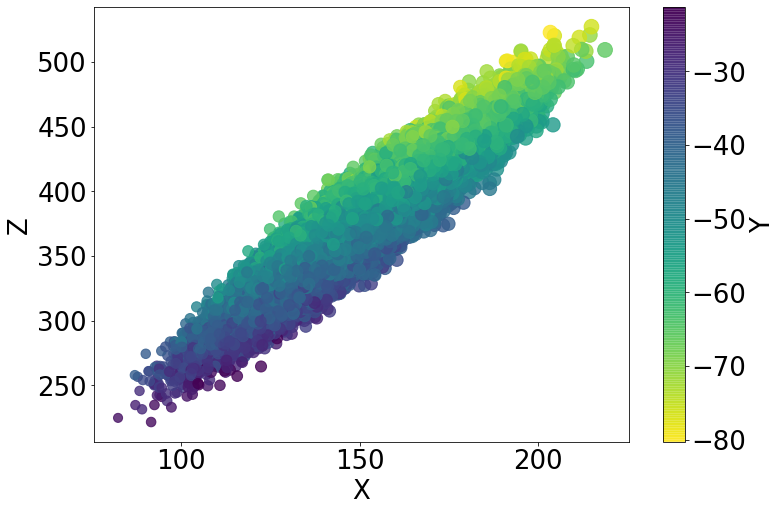

In [3]:
import matplotlib.pyplot as plt
# We can visualize the correlation of these variables on four dimensions:
#     2 dimensions in x-y space, a 3rd dimension using size and a fourth using color
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
df.plot.scatter(x = "X", y = "Z", c = "Y",s = "X", cmap = "viridis_r",alpha = .8, ax = ax)

In [4]:
df.corr()

,P,Q,X,Y,Z
P,1.000000,0.001012,0.000379,-0.000515,0.141161
Q,0.001012,1.000000,0.949021,-0.707006,0.914833
X,0.000379,0.949021,1.000000,-0.671576,0.934645
Y,-0.000515,-0.707006,-0.671576,1.000000,-0.846145
Z,0.141161,0.914833,0.934645,-0.846145,1.000000


In [5]:
import statsmodels.api as sm

residuals = {}
for y_var in df.keys():
    X_vars = list(df.keys())
    X_vars.remove(y_var)
    X = df [X_vars]
    X["Constant"] = 1
    y = df[[y_var]]
    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())
    residuals[y_var] = results.resid
residuals = pd.DataFrame(residuals)

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                 2.511e+04
Date:                Thu, 28 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:05:49   Log-Likelihood:            -1.9862e+05
No. Observations:              100000   AIC:                         3.972e+05
Df Residuals:                   99995   BIC:                         3.973e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Q              0.0012      0.004      0.324      0.7

In [6]:
residuals

,P,Q,X,Y,Z
0,1.583263,-0.208702,1.747949,-2.258544,-3.986362
1,-3.579563,-0.504574,-1.623901,1.307392,3.248131
2,3.366243,1.874675,-0.954430,-0.995526,-2.099495
3,-1.685415,-0.382918,-2.177993,0.005393,3.798899
4,1.351781,-3.283664,5.860594,-3.301481,-6.145819
...,...,...,...,...,...
99995,-0.420806,0.839170,-0.697537,-1.562289,-1.447390
99996,-0.894839,2.484228,-2.023228,-0.177155,-0.383343
99997,-0.550494,0.106114,1.814350,-0.428725,-3.286768
99998,0.075838,0.529785,0.858263,-1.193308,-1.946793


In [7]:
residuals.corr()[residuals.corr().abs() < 1].mul(-1).fillna(1).round(2)

,P,Q,X,Y,Z
P,1.00,0.00,-0.59,0.63,0.71
Q,0.00,1.00,0.50,-0.13,0.00
X,-0.59,0.50,1.00,0.74,0.83
Y,0.63,-0.13,0.74,1.00,-0.89
Z,0.71,0.00,0.83,-0.89,1.00


In [8]:
# !pip install pinguoin

In [9]:
import pingouin
df.pcorr().round(2)

,P,Q,X,Y,Z
P,1.00,0.00,-0.59,0.63,0.71
Q,0.00,1.00,0.50,-0.13,0.00
X,-0.59,0.50,1.00,0.74,0.83
Y,0.63,-0.13,0.74,1.00,-0.89
Z,0.71,0.00,0.83,-0.89,1.00


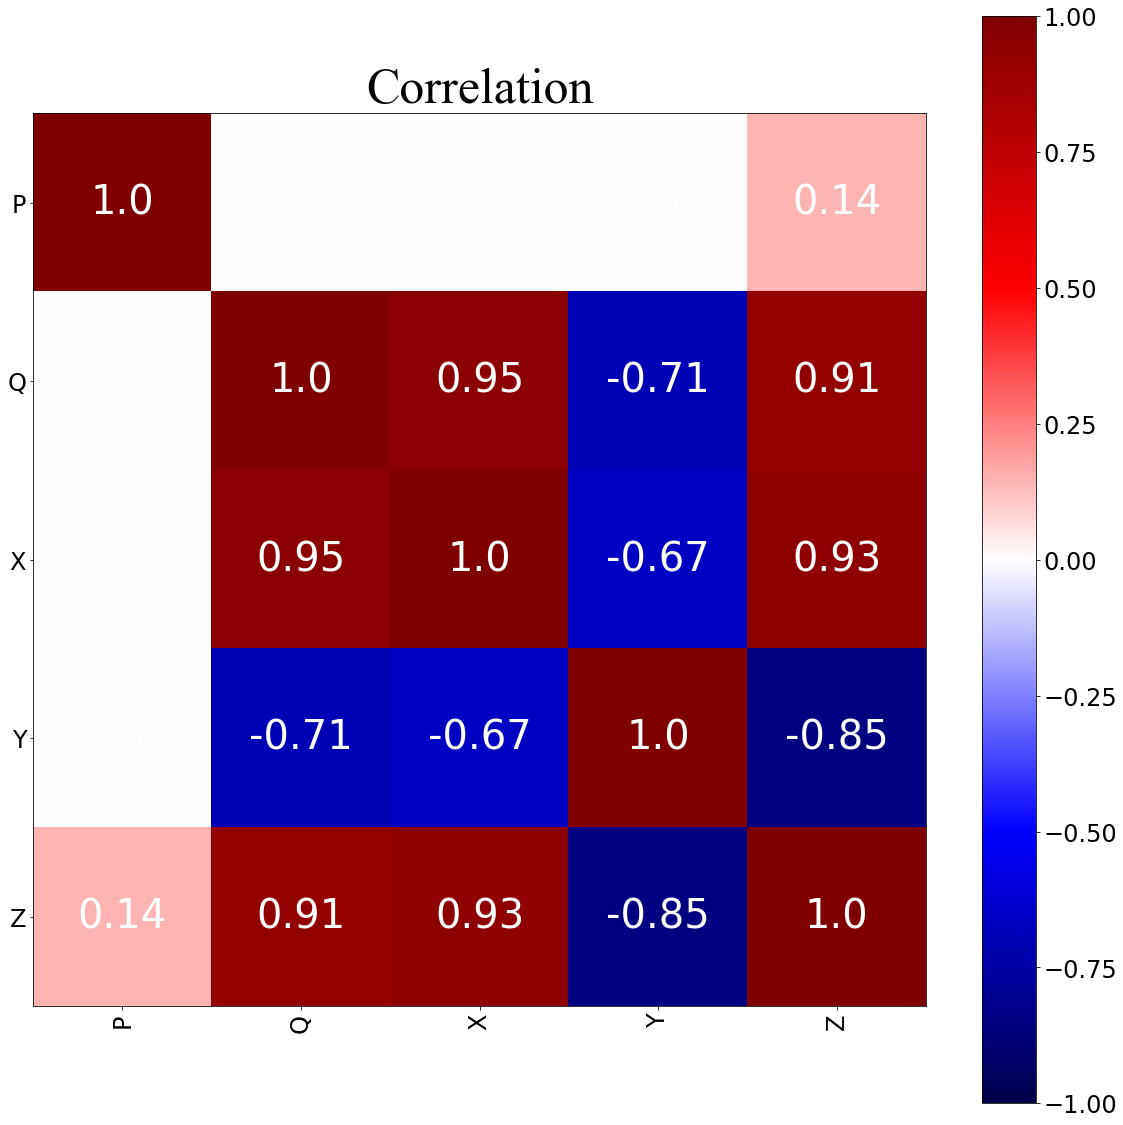

In [10]:
from datlib.plots import *
corr_matrix_heatmap(df.corr(),
                   save_fig = False,
                   pp = None,
                   title = "Correlation")


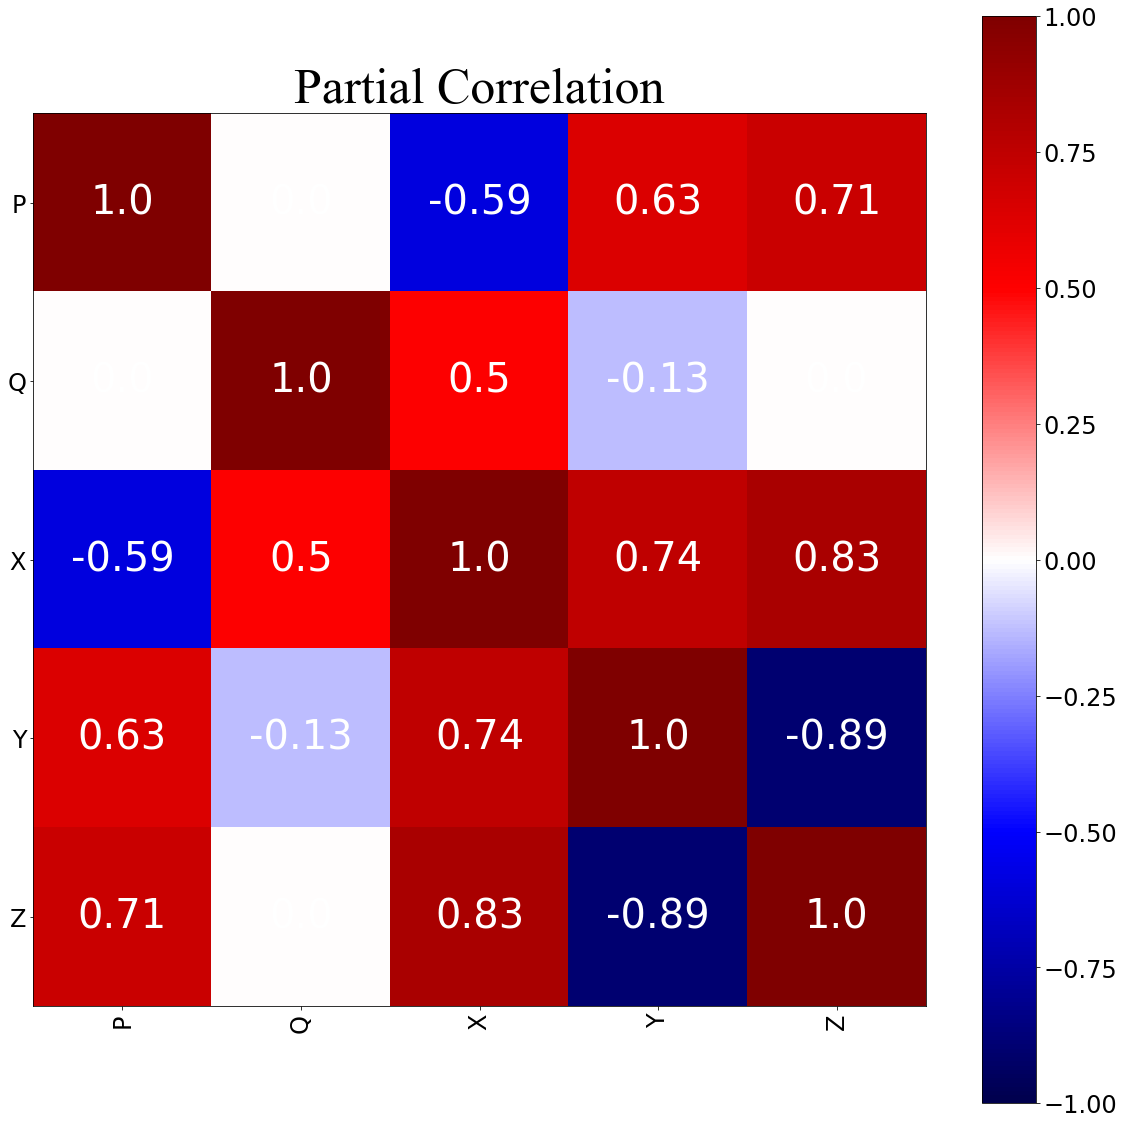

In [11]:
corr_matrix_heatmap(df.pcorr(),
                   save_fig = False,
                   pp = None,
                   title = "Partial Correlation")


In [12]:
pcorr_pvalues = {}

for y, Y in residuals.items():
    pcorr_pvalues[y] = {}
    for x, X in residuals.items():
        if x != y:
            # regress one residual on the other
            #  save the pvalue for the explanatory variable
            #  this is the pvalue of the partial correlation
            results = sm.OLS(Y, X).fit()
            pcorr_pvalues[y][x] = results.pvalues[x]
            print(results.summary())
        else:
            pcorr_pvalues[y][x] = np.NaN
            
pd.DataFrame(pcorr_pvalues).round(2)

                                 OLS Regression Results                                
Dep. Variable:                      P   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.1053
Date:                Thu, 28 Oct 2021   Prob (F-statistic):                       0.746
Time:                        17:05:53   Log-Likelihood:                     -1.9862e+05
No. Observations:              100000   AIC:                                  3.972e+05
Df Residuals:                   99999   BIC:                                  3.972e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

                                 OLS Regression Results                                
Dep. Variable:                      X   R-squared (uncentered):                   0.553
Model:                            OLS   Adj. R-squared (uncentered):              0.553
Method:                 Least Squares   F-statistic:                          1.236e+05
Date:                Thu, 28 Oct 2021   Prob (F-statistic):                        0.00
Time:                        17:05:53   Log-Likelihood:                     -2.0362e+05
No. Observations:              100000   AIC:                                  4.073e+05
Df Residuals:                   99999   BIC:                                  4.073e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

,P,Q,X,Y,Z
P,NaN,0.75,0.0,0.0,0.00
Q,0.75,NaN,0.0,0.0,0.85
X,0.00,0.00,NaN,0.0,0.00
Y,0.00,0.00,0.0,NaN,0.00
Z,0.00,0.85,0.0,0.0,NaN


In [13]:
undirected_graph = {key:[] for key in df.keys()}
for x in undirected_graph:
    undirected_graph[x] = [y for y in df.keys() if y != x]
undirected_graph

{'P': ['Q', 'X', 'Y', 'Z'],
 'Q': ['P', 'X', 'Y', 'Z'],
 'X': ['P', 'Q', 'Y', 'Z'],
 'Y': ['P', 'Q', 'X', 'Z'],
 'Z': ['P', 'Q', 'X', 'Y']}

In [14]:
import copy
p_val = .01
def build_skeleton(df, undirected_graph):
    def check_remaining_controls(control_vars, undirected_graph, x, y, controls_used) :
        for c_var in control_vars:
            # set c_used every time use cycle through a new control
            #  the program will then iterate through remaining controls
            #  until statistical significance is broken
            c_used = copy.copy(controls_used)
            if y in undirected_graph[x]:
                c_used.append(c_var)
                print(x,y, controls_used)
                test = df.partial_corr(x = x, y = y, covar=c_used,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val: 

                    undirected_graph[x].remove(y)
                    break
                else:
                    remaining_controls = copy.copy(control_vars)
                    remaining_controls.remove(c_var)

                    # recursive function that iterates through remaining variables 
                    #  uses them as controls statistical significance holds without them,
                    #  otherwise break
                    check_remaining_controls(remaining_controls, undirected_graph, x, y, c_used)

    for x in df.keys():
        ys = undirected_graph[x]
        for y in df.keys():
            if x != y:
                test = df.partial_corr(x=x, 
                                       y=y, 
                                       covar = None,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
                else:
                    control_vars = [z for z in df.keys() if z != y and z != x]
                    check_remaining_controls(control_vars, undirected_graph, x, y, [])
    return undirected_graph

build_skeleton(df, undirected_graph)

P Z []
P Z ['Q']
P Z ['Q', 'X']
P Z ['Q']
P Z ['Q', 'Y']
P Z []
P Z ['X']
P Z ['X', 'Q']
P Z ['X']
P Z ['X', 'Y']
P Z []
P Z ['Y']
P Z ['Y', 'Q']
P Z ['Y']
P Z ['Y', 'X']
Q X []
Q X ['P']
Q X ['P', 'Y']
Q X ['P']
Q X ['P', 'Z']
Q X []
Q X ['Y']
Q X ['Y', 'P']
Q X ['Y']
Q X ['Y', 'Z']
Q X []
Q X ['Z']
Q X ['Z', 'P']
Q X ['Z']
Q X ['Z', 'Y']
Q Y []
Q Y ['P']
Q Y ['P', 'X']
Q Y ['P']
Q Y ['P', 'Z']
Q Y []
Q Y ['X']
Q Y ['X', 'P']
Q Y ['X']
Q Y ['X', 'Z']
Q Y []
Q Y ['Z']
Q Y ['Z', 'P']
Q Y ['Z']
Q Y ['Z', 'X']
Q Z []
Q Z ['P']
Q Z ['P', 'X']
X Q []
X Q ['P']
X Q ['P', 'Y']
X Q ['P']
X Q ['P', 'Z']
X Q []
X Q ['Y']
X Q ['Y', 'P']
X Q ['Y']
X Q ['Y', 'Z']
X Q []
X Q ['Z']
X Q ['Z', 'P']
X Q ['Z']
X Q ['Z', 'Y']
X Y []
X Y ['P']
X Z []
X Z ['P']
X Z ['P', 'Q']
X Z ['P']
X Z ['P', 'Y']
X Z []
X Z ['Q']
X Z ['Q', 'P']
X Z ['Q']
X Z ['Q', 'Y']
X Z []
X Z ['Y']
X Z ['Y', 'P']
X Z ['Y']
X Z ['Y', 'Q']
Y Q []
Y Q ['P']
Y Q ['P', 'X']
Y Q ['P']
Y Q ['P', 'Z']
Y Q []
Y Q ['X']
Y Q ['X', 'P']
Y Q ['X

{'P': ['Z'],
 'Q': ['X', 'Y'],
 'X': ['Q', 'Z'],
 'Y': ['Q', 'Z'],
 'Z': ['P', 'X', 'Y']}

In [15]:
import matplotlib.pyplot as plt
import networkx as nx

def graph_DAG(undirected_graph, df, title = "DAG Structure"):
    pcorr_matrix = df.pcorr()
    graph= nx.Graph()
    edges = []
    edge_labels = {}
    for key in undirected_graph:
        for key2 in undirected_graph[key]:
            if (key2, key) not in edges:
                edge = (key, key2)
                edges.append(edge)
                edge_labels[edge] = str(round(pcorr_matrix.loc[key][key2], 2))
    
    print(edges)
    print(edge_labels)
    
    
    graph.add_edges_from(edges)

graph_DAG(undirected_graph, df)

[('P', 'Z'), ('Q', 'X'), ('Q', 'Y'), ('X', 'Z'), ('Y', 'Z')]
{('P', 'Z'): '0.71', ('Q', 'X'): '0.5', ('Q', 'Y'): '-0.13', ('X', 'Z'): '0.83', ('Y', 'Z'): '-0.89'}
